In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-prediction-dataset/adult.csv


# Adult Income Prediction with a Neural Network

## Project Overview
This project predicts whether an individual's income exceeds **$50,000 annually** using the **1994 U.S. Census dataset**.  
It demonstrates a complete machine learning workflow — from **data preprocessing** to **building and evaluating** a neural network model.

---

## Dataset
- **Source:** [Adult Income Prediction Dataset on Kaggle](https://www.kaggle.com/datasets/uciml/adult-census-income)  
- **Features:** Includes attributes such as **age, education, occupation, capital gain**, etc.  
- **Target:** Classifying individuals into:
  - `<=50K`
  - `>50K`

---

## Methodology
1. **Data Preprocessing**  
   - Handled missing values (`?`).  
   - Encoded categorical features into numeric form.  
   - Dropped irrelevant column: `fnlwgt`.

2. **Feature Scaling**  
   - Applied **StandardScaler** on numerical features to improve neural network convergence.

3. **Model Training**  
   - Implemented a **Multi-layer Perceptron (MLPClassifier)** from scikit-learn.  

4. **Model Evaluation**  
   - Metrics: **Accuracy, Precision, Recall, F1-score**  
   - Visualized performance with a **Confusion Matrix**.

---

## Results
- The trained neural network achieved **high accuracy** on the test set.  
- The **confusion matrix** showed reliable classification of both income categories.  

---

## Future Improvements
- Experiment with advanced architectures using **TensorFlow** or **PyTorch**.  
- Perform **hyperparameter tuning** to optimize MLP performance.  
- Apply **feature engineering** to create new informative variables.  
- Compare performance with other models like **Random Forest** and **Gradient Boosting Machines**.  

---


Dataset loaded successfully!

--- Data Preprocessing and Cleaning ---
Dropped 'fnlwgt' column.
Dropped rows with missing values. New shape: (30162, 14)
Encoding categorical features...
Categorical and target variables encoded.

Training set size: 24129 samples
Testing set size: 6033 samples

--- Scaling Numerical Features ---
Numerical features scaled.

--- Training Neural Network Model ---
Neural Network model trained successfully.

--- Neural Network Model Evaluation ---
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4533
           1       0.73      0.55      0.63      1500

    accuracy                           0.84      6033
   macro avg       0.80      0.74      0.76      6033
weighted avg       0.83      0.84      0.83      6033



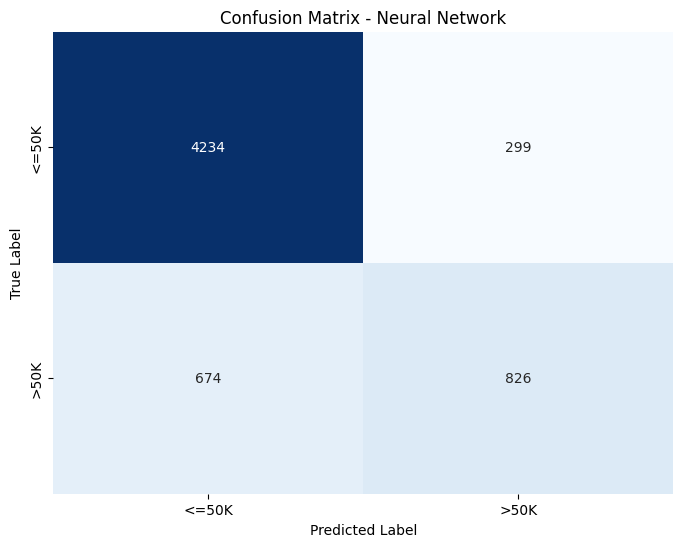

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading ---

def load_data():
    """
    Loads the Adult Income dataset from a CSV file.
    Note: For a Kaggle notebook, the file path is usually relative to the input folder.
    """
    try:
        # Update this path to match the file name in your Kaggle dataset.
        file_path = "/kaggle/input/adult-income-prediction-dataset/adult.csv"
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please ensure the dataset is uploaded to your Kaggle notebook.")
        return None

# --- 2. Data Preprocessing and Cleaning ---

def preprocess_data(df):
    """
    Cleans and preprocesses the dataset for model training.
    """
    print("\n--- Data Preprocessing and Cleaning ---")
    
    # Drop the 'fnlwgt' column as it's a sampling weight and not useful for prediction.
    if 'fnlwgt' in df.columns:
        df.drop('fnlwgt', axis=1, inplace=True)
        print("Dropped 'fnlwgt' column.")
    
    # Drop rows with missing values (represented by '?')
    df = df.replace('?', pd.NA).dropna()
    print(f"Dropped rows with missing values. New shape: {df.shape}")

    # Handle categorical features and the target variable
    categorical_features = ['workclass', 'education', 'marital.status', 'occupation',
                            'relationship', 'race', 'sex', 'native.country']
    target = 'income'

    # Encode categorical features
    print("Encoding categorical features...")
    for col in categorical_features:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    
    # Encode the target variable
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])
    print("Categorical and target variables encoded.")
    
    return df

# --- 3. Feature Scaling ---

def scale_features(X_train, X_test, numerical_features):
    """
    Scales numerical features using StandardScaler.
    """
    print("\n--- Scaling Numerical Features ---")
    scaler = StandardScaler()
    X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = scaler.transform(X_test[numerical_features])
    print("Numerical features scaled.")
    return X_train, X_test

# --- 4. Model Training (Neural Network) ---

def train_nn_model(X_train, y_train):
    """
    Trains a Neural Network (MLPClassifier) model.
    """
    print("\n--- Training Neural Network Model ---")
    # MLPClassifier is a type of feedforward neural network.
    # The parameters can be tuned for better performance.
    model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
    model.fit(X_train, y_train)
    print("Neural Network model trained successfully.")
    return model

# --- 5. Model Evaluation ---

def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the model and prints key metrics.
    """
    print(f"\n--- {model_name} Model Evaluation ---")
    y_pred = model.predict(X_test)
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
# --- Main Script ---

if __name__ == "__main__":
    
    # Load the data
    df = load_data()
    
    if df is not None:
        # Preprocess the data
        df = preprocess_data(df)
        
        # Define features and target
        features = df.columns.drop('income')
        target = 'income'
        
        X = df[features]
        y = df[target]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(f"\nTraining set size: {X_train.shape[0]} samples")
        print(f"Testing set size: {X_test.shape[0]} samples")
        
        # Identify numerical features for scaling
        numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
        
        # Scale  numerical features
        X_train, X_test = scale_features(X_train, X_test, numerical_features)
        
        # Train and evaluate the Neural Network model
        nn_model = train_nn_model(X_train, y_train)
        evaluate_model(nn_model, X_test, y_test, "Neural Network")
